<a href="https://colab.research.google.com/github/spilt-n-merge/my-work/blob/main/Hand_Written_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit recogniser

### Importing Libraries

In [ ]:
# importing library
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Loading Dataset

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape


(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### scaling

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Visualizing Data

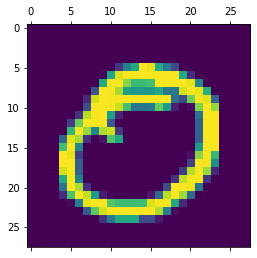

In [ ]:
plt.matshow(X_train[9834])

In [ ]:
y_train[2]

4

In [ ]:
y_train[:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

## flattening

In [ ]:
# flattening a pixels


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [ ]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Model Building

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# dense means every neuron in input layer is connected to every neuron in output layer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# optimizer -> allow you to train efficiently
# loss -> sparse 
# metrics -> performance
model.fit(X_train_flattened, y_train, epochs=5)
# fit -> where training is happen
# epochs -> no of iteration

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7176 - accuracy: 0.8104
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3087 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2810 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2702 - accuracy: 0.9252
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2676 - accuracy: 0.9241


### Model Evaluation

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.9264


[0.2663673758506775, 0.9264000058174133]

### Predictions

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.2101989e-02, 3.1909073e-07, 4.7428757e-02, 9.6370924e-01,
       2.2151172e-03, 1.1868909e-01, 1.0667280e-06, 9.9970269e-01,
       9.5287561e-02, 7.0422518e-01], dtype=float32)

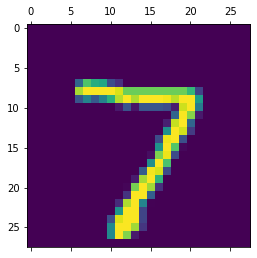

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Confusion Matrix

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,    9,  925,   17,    9,    3,   13,   10,   35,    4],
       [   3,    0,   17,  932,    0,   20,    2,   11,   17,    8],
       [   2,    1,    3,    1,  905,    0,   10,    4,    9,   47],
       [   8,    3,    4,   34,    9,  777,   14,    6,   29,    8],
       [  13,    3,    7,    1,    8,   12,  911,    2,    1,    0],
       [   1,    5,   21,    8,    5,    0,    0,  946,    3,   39],
       [   8,   10,    6,   26,    9,   29,   10,   10,  854,   12],
       [  11,    7,    1,   12,   20,    8,    0,   15,    3,  932]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

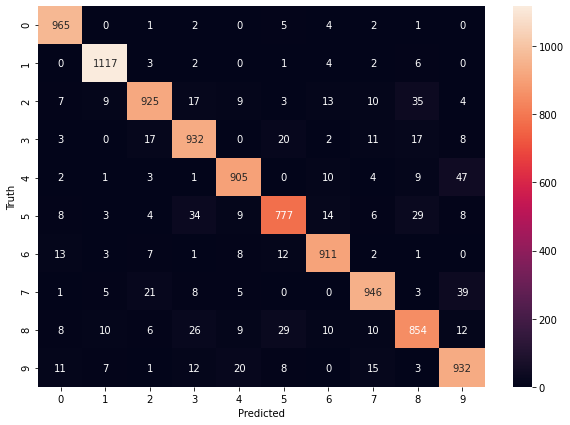

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adding Hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
# 100 is no of neurons in hidden layer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4520 - accuracy: 0.8719
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1278 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0833 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0614 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0485 - accuracy: 0.9855


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9757


[0.08129750937223434, 0.9757000207901001]

Text(69.0, 0.5, 'Truth')

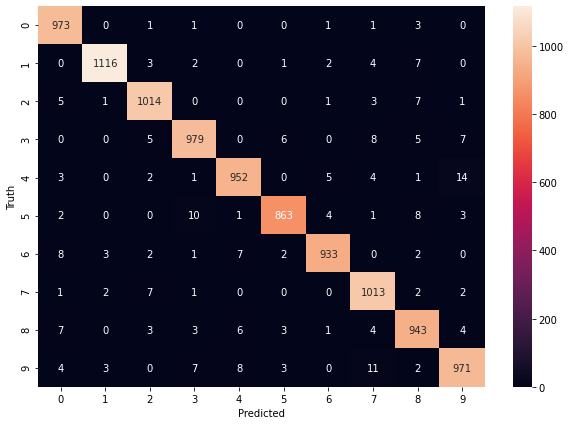

In [ ]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# using flatten
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4608 - accuracy: 0.8687
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1379 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0920 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0523 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0320 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

## Activation Functions

In [ ]:
# sigmoid

import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
sigmoid(100)

1.0

In [ ]:
sigmoid(-200)

1.3838965267367376e-87

In [ ]:
sigmoid(0.5)

0.6224593312018546

In [ ]:
# tanh
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))


In [ ]:
tanh(-56)

-1.0

In [ ]:
tanh(50)

1.0

In [ ]:
tanh(1)

0.7615941559557649

In [ ]:
# ReLU

def relu(x):
    return max(0,x)

In [ ]:
relu(-100)

0

In [ ]:
relu(5)

5

In [ ]:
# Leaky Relu
def leaky_relu(x):
    return max(0.1*x,x)

In [ ]:
leaky_relu(-100)

-10.0

In [ ]:
leaky_relu(10)

10